In [2]:
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from skimage.util import random_noise
# import cv2
from sklearn.metrics import mean_squared_error
# from keras.datasets import mnist
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


---
load mnist dataset.

get random image from all dataset.

---

11501568/11490434 [==============================] - 0s 0us/step


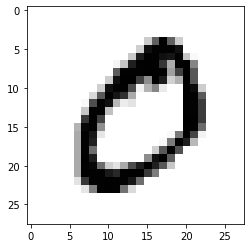

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img=x_train[1]
plt.imshow(img,cmap="binary")

---
add gaussian random noise on image 

In [5]:
noisy_img=random_noise(img,'gaussian',var=0.05,seed=42)


--- 
fit pca on noisy image to denoise and determine main component that represent image variance.

---

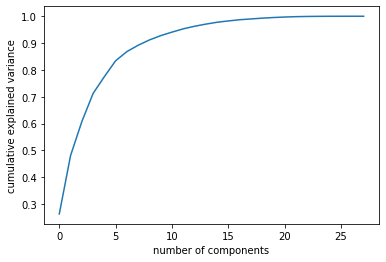

In [6]:
pca = PCA().fit(noisy_img)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

---
get 90% of image variance

---

In [7]:
pca=PCA(0.9)
pca.fit(noisy_img)
adj_img =pca.inverse_transform(pca.transform(noisy_img))
pca.n_components_

9

---
plot original, noisy and adjusted images 

---

Text(0.5, 1.0, 'PCA adjusted image')

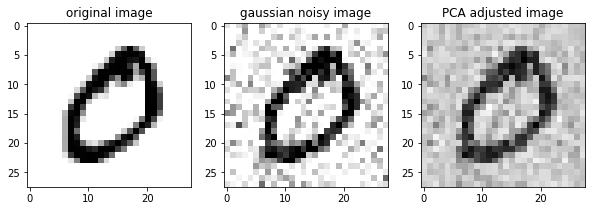

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.imshow(img,cmap="binary")
plt.title('original image')
plt.subplot(1, 3, 2)
plt.imshow(noisy_img,cmap="binary")
plt.title('gaussian noisy image')
plt.subplot(1, 3, 3)
plt.imshow(adj_img,cmap="binary")
plt.title('PCA adjusted image')

---
**conclusions:** we can see that pca can denoise gaussian noise image not perfect as other techniques like gaussian filter but could be satisfied.

---


---
add salt and pepper random noise on image

---

In [9]:
noisy_img2=random_noise(img,'s&p',amount=0.08,seed=42)

--- 
fit pca on noisy image to denoise and determine main component that represent image variance.

---

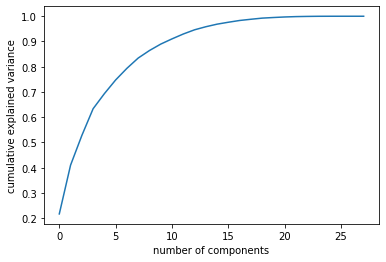

In [10]:
pca = PCA().fit(noisy_img2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

---
get 90% of image variance

---

In [12]:
pca=PCA(0.9)
pca.fit(noisy_img2)
adj_img2 =pca.inverse_transform(pca.transform(noisy_img))
pca.n_components_

11

---
plot original, noisy and adjusted images 

---

Text(0.5, 1.0, 'PCA adjusted image')

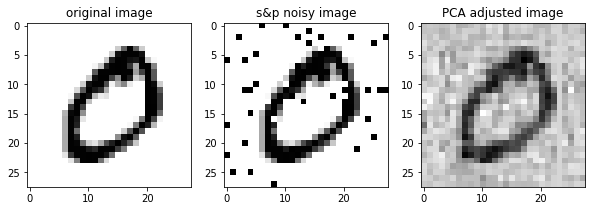

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.imshow(img,cmap="binary")
plt.title('original image')
plt.subplot(1, 3, 2)
plt.imshow(noisy_img2,cmap="binary")
plt.title('s&p noisy image')
plt.subplot(1, 3, 3)
plt.imshow(adj_img2,cmap="binary")
plt.title('PCA adjusted image')

---
**conclusions:** 
as we saw in gaussian noise we can see the same thing in  salt and pepper noise


---

## e. Linear discriminant analysis suffers from multicollinearity

---
Generate a highly correlated dataset

---

In [10]:
cov=(np.random.rand(3,3))
mean=np.array([5,0,-5])
data=np.random.multivariate_normal(mean, cov, 300)

<ipython-input-10-1b2c7d213a6d>:3: RuntimeWarning: covariance is not positive-semidefinite.
  data=np.random.multivariate_normal(mean, cov, 300)


In [12]:
data

array([[ 5.05276819e+00, -1.93990611e-01, -5.30007483e+00],
       [ 4.81123727e+00,  5.00858108e-01, -4.49727355e+00],
       [ 4.47512072e+00,  5.61342611e-01, -4.62769876e+00],
       [ 4.55510771e+00,  6.44414334e-02, -4.97527161e+00],
       [ 4.64062995e+00,  1.09994527e+00, -4.01390892e+00],
       [ 5.40627409e+00,  7.94351625e-01, -4.00338860e+00],
       [ 5.65344064e+00, -2.46383811e-01, -5.07926679e+00],
       [ 5.76158237e+00,  7.57215651e-01, -4.13010244e+00],
       [ 5.30158119e+00,  6.55532618e-01, -4.41296855e+00],
       [ 4.17412059e+00, -4.39654101e-01, -5.77854508e+00],
       [ 4.10494403e+00, -1.01901653e+00, -6.13229477e+00],
       [ 5.87370174e+00,  1.85441982e-01, -4.55530317e+00],
       [ 7.89717009e+00,  1.19894770e+00, -2.84660060e+00],
       [ 5.33609057e+00, -4.04350857e-01, -5.23382188e+00],
       [ 4.59608910e+00,  3.92080365e-01, -4.65175089e+00],
       [ 5.72433587e+00,  9.04444348e-01, -3.81329737e+00],
       [ 3.69976534e+00,  1.34807991e+00

---
create random labels

---

In [4]:
labels=np.zeros(300)
labels[101:201]=1
labels[201:]=2

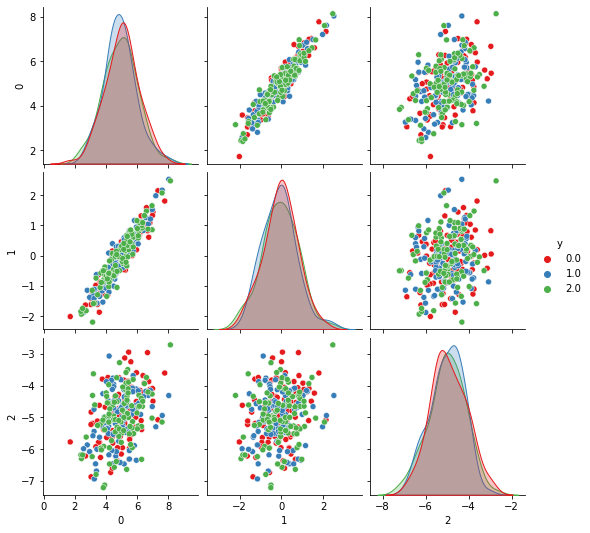

In [5]:
df=pd.DataFrame(data)
df['y']=labels
sns.pairplot(df, diag_kind="kde", kind="scatter", palette="Set1", hue = 'y')

---
decorrelate the features using matrix decomposition

---

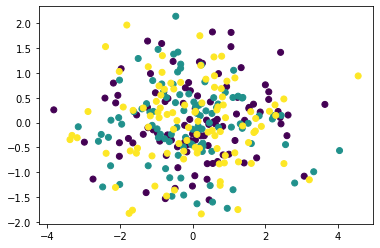

In [6]:
pca=PCA(2)
pca.fit(data)
projected_data =pca.transform(data)
plt.scatter(projected_data[:,0] , projected_data[:,1],c=labels)
plt.show()

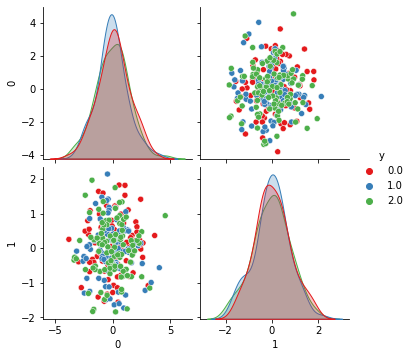

In [7]:
df=pd.DataFrame(projected_data)
df['y']=labels
sns.pairplot(df, diag_kind="kde", kind="scatter", palette="Set1", hue = 'y')

---
fit the data against a linear discriminant model

---

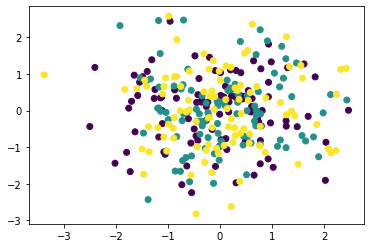

In [8]:
clf = LinearDiscriminantAnalysis()
new_data = clf.fit_transform(projected_data, labels)
plt.scatter(new_data[:,0] , new_data[:,1],c=labels)
plt.show()


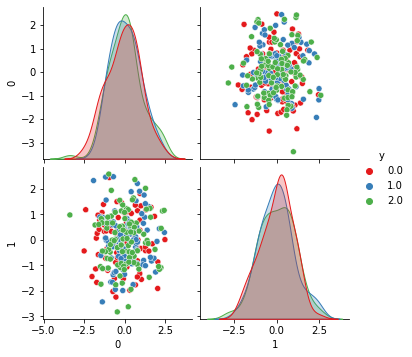

In [9]:
df=pd.DataFrame(new_data)
df['y']=labels
sns.pairplot(df, diag_kind="kde", kind="scatter", palette="Set1", hue = 'y')